In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

class Box():
    """Box defines a square in the occupancy grid that has an obstacle"""
    def __init__(self, x, y):
        self.x, self.y = x,y

class Obstacle():
    """Obstacle contains all of the occupied boxes in the grid for one obstacle"""
    def __init__(self, start_box, num_boxes, x_bound, y_bound):
        self.boxes = [start_box]
        self.num_boxes = num_boxes
        self.generate(x_bound, y_bound)

    def generate(self, x_bound, y_bound):
        for _ in range(self.num_boxes-1):
            self.add(x_bound, y_bound)

    def checkPlacements(self, box, x_bound, y_bound):
        # Check right
        free_right = True
        if box.x + 1 >= x_bound or any([other_box.y == box.y and other_box.x == box.x+1 for other_box in self.boxes]):
            free_right = False
        # Check left
        free_left = True
        if box.x - 1 < 0 or any([other_box.y == box.y and other_box.x == box.x-1 for other_box in self.boxes]):
            free_left = False
        # Check up
        free_up = True
        if box.y + 1 >= y_bound or any([other_box.x == box.x and other_box.y == box.y+1 for other_box in self.boxes]):
            free_up = False
        # Check down
        free_down = True
        if box.y -1 < 0 or any([other_box.x == box.x and other_box.y == box.y-1 for other_box in self.boxes]):
            free_down = False
        free_places = [free_right, free_left, free_up, free_down]
        return free_places

    def getBoxPlacements(self,x_bound, y_bound):
        # Filter out boxes that are surrounded on all sides by other boxes or the map boundary
        filtered_boxes = []
        free_placements = []
        for box in self.boxes:
            free_places = self.checkPlacements(box, x_bound, y_bound)
            if any(free_places):
                filtered_boxes.append(box)
                free_placements.append(free_places)
        return filtered_boxes, free_placements

    def add(self, x_bound, y_bound):
        """Add a box building from existing boxes"""
        filtered_boxes, free_placements = self.getBoxPlacements(x_bound, y_bound)
        # If you have no valid placements. Give up
        if len(filtered_boxes) == 0:
            return None
        # Now pick where to add a box
        box_datas = [(box, place) for box, place in zip(filtered_boxes, free_placements)]
        box_data_id = np.random.choice(list(range(len(box_datas))))
        root_box, places = box_datas[box_data_id][0], box_datas[box_data_id][1]
        choices = ['right', 'left', 'up', 'down']
        valid_choices = []
        for choice, place in zip(choices, places):
            if place:
                valid_choices.append(choice)
        # We chose where to put it
        chosen = np.random.choice(valid_choices)
        delta = np.array([0,0])
        if chosen == 'right':
            delta[0]+=1
        elif chosen == 'left':
            delta[0]-=1
        elif chosen == 'up':
            delta[1]+=1
        elif chosen == 'down':
            delta[1]-=1
        # Create the box
        box = Box(x=root_box.x+delta[0], y=root_box.y+delta[1])
        # Add the box, finally
        self.boxes.append(box)

[(5, 5), (5, 6), (5, 7), (5, 8), (6, 6), (7, 6), (8, 6)]
5 5 [True, True, False, True]
5 6 [False, True, False, False]
5 7 [True, True, False, False]
5 8 [True, True, True, False]
6 6 [False, False, True, True]
7 6 [False, False, True, True]
8 6 [True, False, True, True]


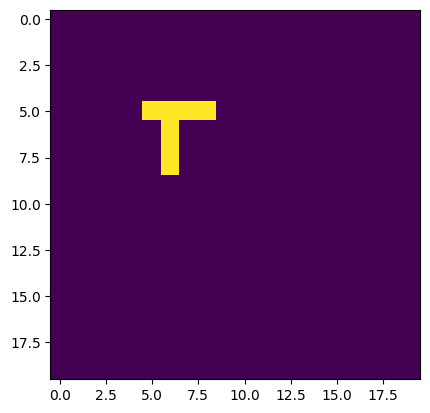

In [2]:
"""Tests"""
# box = Box(x=9,y=9)
# obstacle = Obstacle(box, 0, x_bound=10, y_bound=10)
# obstacle.checkPlacements(box, 10, 10)

boxes = [
    Box(5,5),
    Box(5,6),
    Box(5,7),
    Box(5,8),
    Box(6,6),
    Box(7,6),
    Box(8,6)
]

obstacle = Obstacle(boxes[0],0,20,20)
print([(box.x, box.y) for box in boxes])
obstacle.boxes = boxes

occupancy_grid = np.zeros((20,20))
for box in obstacle.boxes:
    occupancy_grid[box.x, box.y] = 1

filtered_boxes, free_placements = obstacle.getBoxPlacements(10,10)
for box, free_place in zip(filtered_boxes, free_placements):
    print(box.x, box.y, free_place)

plt.imshow(occupancy_grid)

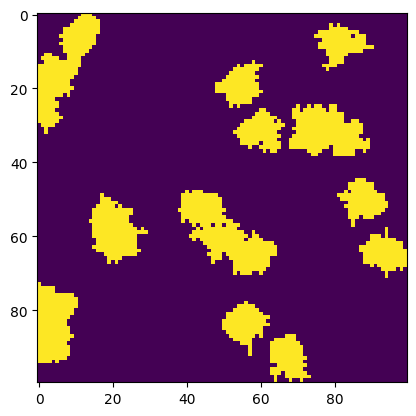

In [3]:
# Generate obstacles in an occupancy grid
x_bound = 100
y_bound = 100
occupancy_grid = np.zeros((100,100))

# Pick where to place obstacles
num_obstacles = 20
num_boxes = 100
xs = np.random.uniform(0, x_bound, num_obstacles).astype(int)
ys = np.random.uniform(0, y_bound, num_obstacles).astype(int)

# Generate obstacles
obstacles = [Obstacle(Box(x,y), num_boxes, x_bound, y_bound) for x,y in zip(xs, ys)]

# Fill the occupancy grid
for obstacle in obstacles:
    for box in obstacle.boxes:
        occupancy_grid[box.x, box.y] = 1

plt.imshow(occupancy_grid)

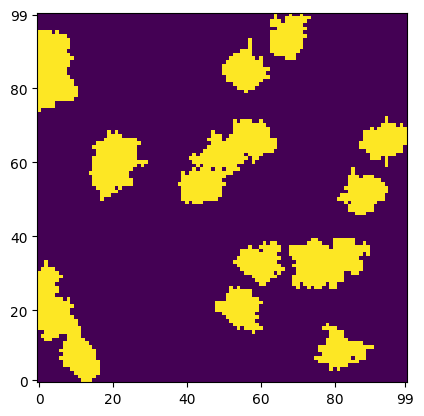

In [4]:
# I like the map I generated. I want to flip the y-axis so I can see it how it's meant to be seen
vis_grid = np.flip(occupancy_grid,axis=0)
plt.yticks(ticks=[0,20,40,60,80,99], labels=[99,80,60,40,20,0])
plt.xticks(ticks=[0,20,40,60,80,99], labels=[0,20,40,60,80,99])
plt.imshow(vis_grid)

In [5]:
# There are some squares that are blocked entirely by obstacles. I'm going to clean this to fill those holes to make coding easier later
def plotGrid(occupancy_grid, ax=None):
    vis_grid = np.flip(occupancy_grid,axis=0)
    if ax is None:
        plt.yticks(ticks=list(range(0,100,5)), labels=reversed(list(range(0,100,5))))
        plt.xticks(ticks=list(range(0,100,5)), labels=list(range(0,100,5)))
        plt.grid()
        plt.imshow(vis_grid)
    else:
        ax.imshow(vis_grid)

In [6]:
def generateOccupancyGrid(x_bound, y_bound, num_obstacles, num_boxes):
    # Generate obstacles in an occupancy grid
    occupancy_grid = np.zeros((x_bound,y_bound))

    # Pick where to place obstacles
    xs = np.random.uniform(0, x_bound, num_obstacles).astype(int)
    ys = np.random.uniform(0, y_bound, num_obstacles).astype(int)

    # Generate obstacles
    obstacles = [Obstacle(Box(x,y), num_boxes, x_bound, y_bound) for x,y in zip(xs, ys)]

    # Fill the occupancy grid
    for obstacle in obstacles:
        for box in obstacle.boxes:
            occupancy_grid[box.x, box.y] = 1

    return occupancy_grid

In [36]:
x_bound=10
y_bound=10
mini_grid = generateOccupancyGrid(x_bound=x_bound, y_bound=y_bound, num_obstacles=4, num_boxes=5)
plotGrid(mini_grid)

In [37]:
# I can do that computationally. Pick a start square. Any square that is not connected to this square (behind an obstacle) gets marked as an obstacle
root_node = np.array([5,5])

# Each node has 4 connections. Each connection is either valid or invalid. Once you know if the validity of each connection, you are done with that node
nodes_to_check = [root_node]
# connection of each checked node. is it connected to the root or not?
checked_nodes = np.zeros(occupancy_grid.shape)
connectivity_grid = np.zeros(mini_grid.shape)

def out_of_bounds(node, x_bound, y_bound):
    if node[0] >= x_bound or node[0] < 0:
        return True
    elif node[1] >= y_bound or node[1] < 0:
        return True
    return False

# keep running until we are done checking nodes
while len(nodes_to_check) > 0:
    # It's a queue. Get the one that has been there the longest
    node = nodes_to_check[0]
    # Check if this node is occupied or not (or out of bounds, which counts as occupied here)
    if out_of_bounds(node, x_bound, y_bound):
        connected = 0
    else:
        connected = 1 - mini_grid[node[0], node[1]]
    # Get its neighbors
    neighbors = [
        node+[1,0],
        node+[-1,0],
        node+[0,1],
        node+[0,-1]
    ]
    # See if we have checked each neighbor. Add them to check if not
    for neighbor in neighbors:
        if out_of_bounds(neighbor, x_bound, y_bound):
            # Don't check this neighbor if it's out of bounds
            continue
        elif mini_grid[node[0], node[1]] == 1:
            # Don't check this neighbor if it's occupied
            continue
        elif checked_nodes[neighbor[0], neighbor[1]] == 1:
            # Don't check this neighbor if we already checked it
            continue
        else:
            nodes_to_check.append(neighbor)

    del nodes_to_check[0]
    checked_nodes[node[0], node[1]] = 1
    connectivity_grid[node[0], node[1]] = connected

In [38]:
# I want to visualize - which ones are connected?
plotGrid(connectivity_grid)

In [14]:
def generateConnectivityGrid(occupancy_grid, root_node, save_intermediate_plots=False, save_frequency=1):
    if save_intermediate_plots:
        fig, ax = plt.subplots(1,1)
    # Each node has 4 connections. Each connection is either valid or invalid. Once you know if the validity of each connection, you are done with that node
    nodes_to_check = [root_node]
    # connection of each checked node. is it connected to the root or not?
    checked_nodes = np.zeros(occupancy_grid.shape)
    connectivity_grid = np.zeros(occupancy_grid.shape)

    x_bound = occupancy_grid.shape[0]
    y_bound = occupancy_grid.shape[1]

    # 0 - Have not checked
    # 1 - Node to check
    # 2 - Connected
    # 3 - Not connected
    # 4 - Checking next
    informative_grid = np.zeros(occupancy_grid.shape)

    def out_of_bounds(node, x_bound, y_bound):
        if node[0] >= x_bound or node[0] < 0:
            return True
        elif node[1] >= y_bound or node[1] < 0:
            return True
        return False

    # keep running until we are done checking nodes
    i = 0
    while len(nodes_to_check) > 0:
        # It's a queue. Get the one that has been there the longest
        node = nodes_to_check[0]
        # Check if this node is occupied or not (or out of bounds, which counts as occupied here)
        if out_of_bounds(node, x_bound, y_bound):
            connected = 0
        else:
            connected = 1 - occupancy_grid[node[0], node[1]]
        # Get its neighbors
        neighbors = [
            node+[1,0],
            node+[-1,0],
            node+[0,1],
            node+[0,-1]
        ]
        # See if we have checked each neighbor. Add them to check if not
        for neighbor in neighbors:
            if out_of_bounds(neighbor, x_bound, y_bound):
                # Don't check this neighbor if it's out of bounds
                continue
            elif occupancy_grid[node[0], node[1]] == 1:
                # Don't check this neighbor if it's occupied
                continue
            elif checked_nodes[neighbor[0], neighbor[1]] == 1:
                # Don't check this neighbor if we already checked it
                continue
            else:
                nodes_to_check.append(neighbor)
                informative_grid[neighbor[0], neighbor[1]] = 1

        if connected == 1:
            informative_grid[node[0], node[1]] = 2
        else:
            informative_grid[node[0], node[1]] = 3

        checked_nodes[node[0], node[1]] = 1
        while len(nodes_to_check) > 0 and checked_nodes[nodes_to_check[0][0], nodes_to_check[0][1]] == 1:
            del nodes_to_check[0]

        if len(nodes_to_check) > 0:
            informative_grid[nodes_to_check[0][0], nodes_to_check[0][1]] = 4

        connectivity_grid[node[0], node[1]] = connected

        if save_intermediate_plots and (i%save_frequency==0 or len(nodes_to_check) == 0):
            plotGrid(informative_grid, ax)
            fig.savefig('outfigs/conenctions_'+str(i)+'.png')
        i+=1
    return connectivity_grid

In [17]:
generateConnectivityGrid(mini_grid, np.array([5,5]),save_intermediate_plots = False);

In [34]:
plotGrid(occupancy_grid)

In [33]:
root_node = np.array([50.,50.])
connectivity_grid = generateConnectivityGrid(occupancy_grid, np.array([50,50]), False, save_frequency=100)
plotGrid(1-connectivity_grid)

In [35]:
# Just wondering if I can plot lines and stuff on images
plotGrid(connectivity_grid)

In [22]:
"""Now it's time to add POIs!"""
def generatePOIs(connectivity_grid, num_pois):
    poi_grid = np.zeros(connectivity_grid.shape)

    # First let's get a list of connected nodes that we can actually put POIs in
    connected_nodes = []
    for xn in range(connectivity_grid.shape[0]):
        for yn in range(connectivity_grid.shape[1]):
            if connectivity_grid[xn, yn] == 1:
                connected_nodes.append(np.array([xn,yn]))
                poi_grid[xn, yn] = 1
    xs = []
    ys = []

    for _ in range(num_pois):
        # First pick a square that is connected (1 not 0 in connectivity grid)
        i = np.random.choice(list(range(len(connected_nodes))))
        node = connected_nodes[i]

        x = node[0]
        y = node[1]

        poi_grid[x,y] = 2

        # Now place the POI randomly within that square
        x = node[0]+np.random.uniform(0,1)
        y = node[1]+np.random.uniform(0,1)

        xs.append(x)
        ys.append(y)

    return poi_grid, xs, ys

poi_grid, poi_xs, poi_ys = generatePOIs(connectivity_grid, num_pois=25)

[50. 50.]


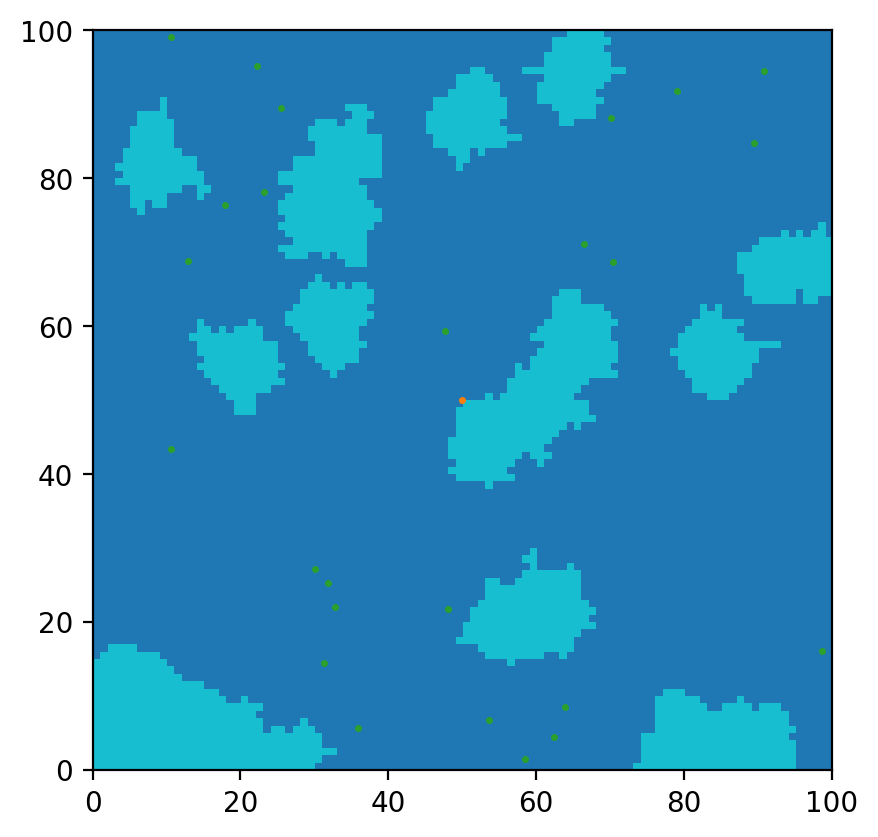

In [23]:
fig, ax = plt.subplots(1,1,dpi=200)
ax.imshow(np.rot90(connectivity_grid), extent=(0.0, poi_grid.shape[1], 0.0, poi_grid.shape[0]), cmap='tab10_r')
ax.plot(poi_xs, poi_ys, '.', color='tab:green', ms=3)
ax.plot(root_node[0], root_node[1], '.', color='tab:orange',ms=3)
print(root_node)

In [24]:
if False:
    all_cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
    for i, c in enumerate(all_cmaps):
        fig, ax = plt.subplots(1,1,dpi=300)
        ax.imshow(np.rot90(connectivity_grid), extent=(0.0, poi_grid.shape[1], 0.0, poi_grid.shape[0]),cmap=c)
        fig.savefig('outfigs_'+str(i)+".png")

In [25]:
all_cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
all_cmaps[147]

'tab10_r'

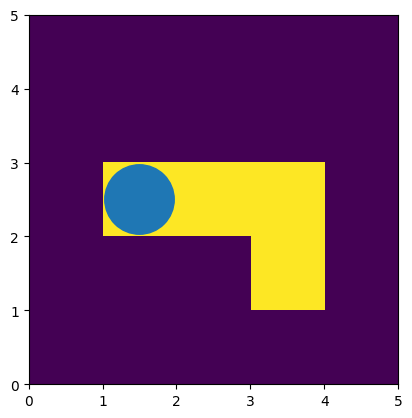

In [26]:
"""Testing out how to plot points on an image"""

img = np.zeros((5,5))

squares = np.array([
    [3,1],
    [3,2],
    [2,2],
    [1,2]
])

for s in squares:
    # img[np.shape(img)[1]-s[1]-1, s[0]] = 1
    # img[s[1], s[0]] = 1
    img[s[0], s[1]] = 1

pt = [1.5,2.5]

fig, ax = plt.subplots(1,1)
ax.plot(pt[0], pt[1], '.', ms=100)
numcols = img.shape[1]
numrows = img.shape[0]
ax.imshow(np.rot90(img), extent=(0.0, numcols, 0.0, numrows))
# ax.imshow(img)

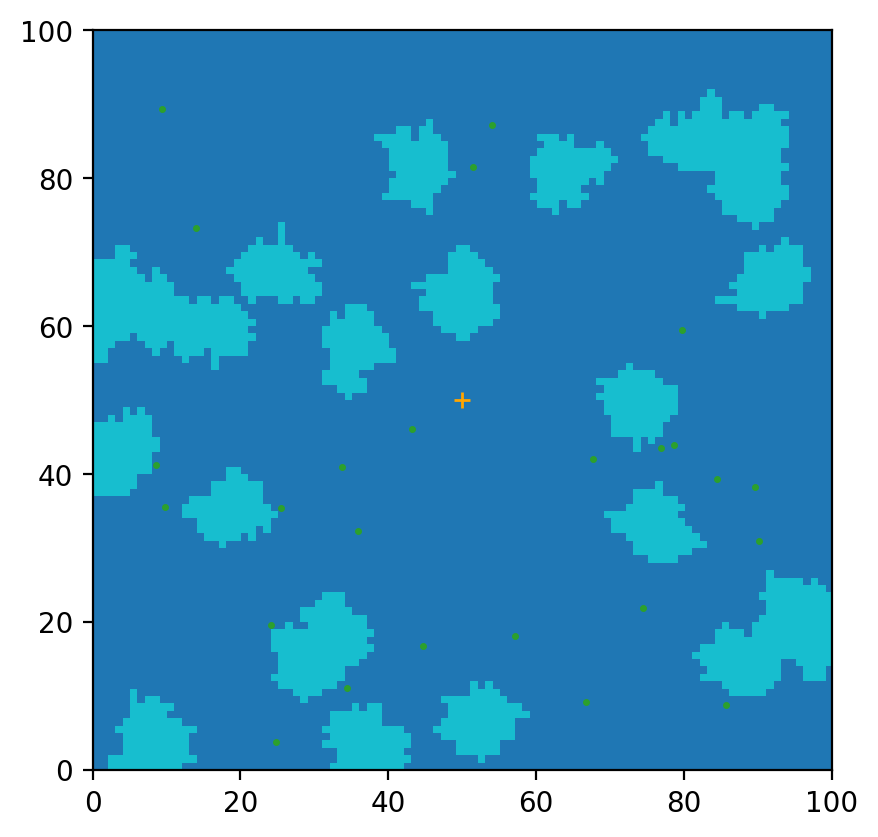

In [51]:
%matplotlib inline
# connectivity_grid
# poi_grid, poi_xs, poi_ys
x_bound, y_bound = 100,100
occupancy_grid = generateOccupancyGrid(x_bound=x_bound, y_bound=y_bound, num_obstacles=25, num_boxes=80)
connectivity_grid = generateConnectivityGrid(occupancy_grid, np.array([50,50]),save_intermediate_plots = False);
poi_grid, poi_xs, poi_ys = generatePOIs(connectivity_grid, num_pois=25)

In [163]:
%matplotlib qt5

path_A = np.array([
    [50,50],
    [36,74],
    [26,75],
    [13.935078677591855, 73.247799368969],
    [9.408718421103485, 89.3496333590279],
    [50,90],
    [53.97276113245288, 87.18401240024879],
    [51.43330138412307,  81.44784209801159],
    [60,70],
    [60,60],
    [50,50]
]).astype(float)

path_B = np.array([
    [50,50],
    [67.7097038428941, 41.94974363640193],
    [84.41305760233627, 39.2424476745082],
    [76.95574427477196, 43.49544545110631],
    [78.59048458434734, 43.89997577209689],
    [89.60953343005373, 38.18769447382723],
    [79.72017678053447, 59.510852425608945],
    [50,50]
]).astype(float)

path_C = np.array([
    [50,50],
    [43.27125692650917, 46.02370545694142],
    [33.80807855103302, 40.980191455243826],
    [35.84701777946561, 32.32456787734268],
    [44.656297466815175, 16.659047900160573],
    [57.13666261909929, 18.073354385798112],
    [66.71401150369839, 9.143873224451522],
    [74.50529060044136, 21.895440828905627],
    [50,50]
]).astype(float)

fig, ax = plt.subplots(1,1,dpi=200)
ax.imshow(np.rot90(connectivity_grid), extent=(0.0, poi_grid.shape[1], 0.0, poi_grid.shape[0]), cmap='tab10_r')
ax.plot(poi_xs, poi_ys, '.', color='tab:green', ms=3)
ax.plot(50,50,'+',color='orange')
ax.plot(path_A[:,0], path_A[:,1], ':', color='purple', lw=1)
ax.plot(path_B[:,0], path_B[:,1], ':', color='pink', lw=1)
ax.plot(path_C[:,0], path_C[:,1], ':', color='tab:cyan', lw=1)

In [53]:
for x, y in zip(poi_xs, poi_ys):
    print(x,y)

85.70630890986145 8.78397730231207
13.935078677591855 73.247799368969
53.97276113245288 87.18401240024879
25.472184832499522 35.44431543829494
8.62410573945375 41.26080339570821
24.867134487911375 3.6657793900696505
67.7097038428941 41.94974363640193
76.95574427477196 43.49544545110631
89.60953343005373 38.18769447382723
35.84701777946561 32.32456787734268
24.1626000938329 19.49569115093495
79.72017678053447 59.510852425608945
34.44665293268794 11.054650594043308
44.656297466815175 16.659047900160573
57.13666261909929 18.073354385798112
43.27125692650917 46.02370545694142
33.80807855103302 40.980191455243826
51.43330138412307 81.44784209801159
74.50529060044136 21.895440828905627
66.71401150369839 9.143873224451522
9.408718421103485 89.3496333590279
78.59048458434734 43.89997577209689
90.1149592300632 30.94737941587423
84.41305760233627 39.2424476745082
9.849781720670082 35.47549220628146


In [102]:
# Save this all to csvs for later
import pandas as pd

In [105]:
connect_df = pd.DataFrame(connectivity_grid)
connect_df.to_csv('env/resources/connectivity.csv')

In [107]:
pois_dict = {"x":[], "y":[]}
for x, y in zip(poi_xs, poi_ys):
    pois_dict['x'].append(x)
    pois_dict['y'].append(y)
pois_df = pd.DataFrame(pois_dict)
pois_df.to_csv('env/resources/pois.csv')

In [108]:
path_a_df = pd.DataFrame({"x":path_A[:,0], "y":path_A[:,1]})
path_a_df.to_csv('env/resources/pathA.csv')

In [109]:
path_b_df = pd.DataFrame({"x":path_B[:,0], "y":path_B[:,1]})
path_b_df.to_csv('env/resources/pathB.csv')

In [110]:
path_c_df = pd.DataFrame({"x":path_C[:,0], "y":path_C[:,1]})
path_c_df.to_csv('env/resources/pathC.csv')

In [113]:
root_node_df = pd.DataFrame({"x":[50.], "y":[50.]})
root_node_df.to_csv('env/resources/root_node.csv')

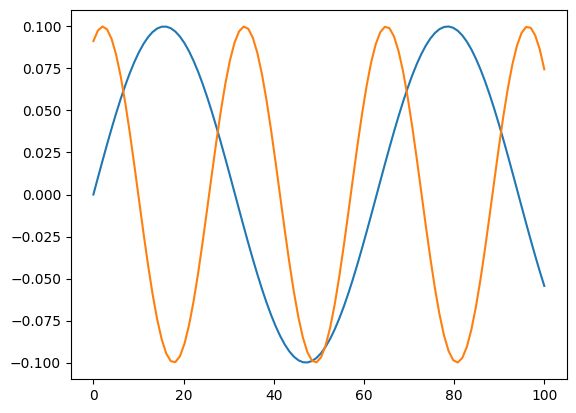

In [171]:
# I also need to generate the waves for position uncertainty
%matplotlib inline
def wave_x(xs):
    return 0.1*np.sin(xs/10)

def wave_y(ys):
    return 0.1*np.sin(ys/5+20)

xs = np.linspace(0,100,100)
ys = np.linspace(0,100,100)
plt.plot(xs, wave_x(xs))
plt.plot(ys, wave_y(ys))

In [155]:
# I want to get an idea of what this gradient looks like
class Vector():
    def __init__(self, startpt, endpt):
        self.startpt = startpt
        self.endpt = endpt

xs = np.linspace(0,100,50)
ys = np.linspace(0,100,50)

vectors = []
for x in xs:
    for y in ys:
        if not out_of_bounds([x,y], x_bound, y_bound) and connectivity_grid[int(x),int(y)] == 1:
            startpt = np.array([x,y])
            endpt = startpt + np.array([wave_x(x), wave_y(y)])
            vectors.append(Vector(startpt, endpt))

(0.0, 100.0)

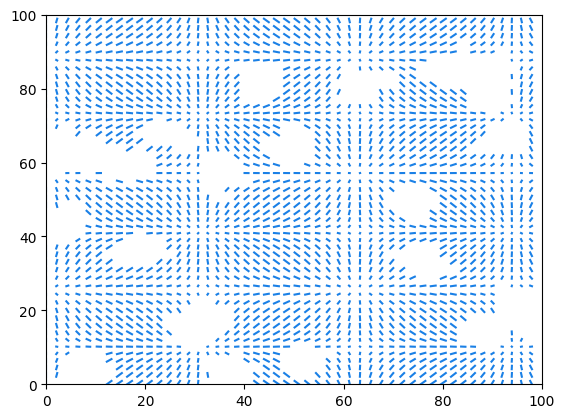

In [157]:
for vector in vectors:
    plt.plot([vector.startpt[0], vector.endpt[0]], [vector.startpt[1], vector.endpt[1]], color=(0.1,0.5,0.9))
plt.xlim([0,100])
plt.ylim([0,100])

In [1]:
%matplotlib qt5
# connectivity_grid
# poi_grid, poi_xs, poi_ys
x_bound, y_bound = 100,100
occupancy_grid = generateOccupancyGrid(x_bound=x_bound, y_bound=y_bound, num_obstacles=25, num_boxes=80)
connectivity_grid = generateConnectivityGrid(occupancy_grid, np.array([50,50]),save_intermediate_plots = False);
poi_grid, poi_xs, poi_ys = generatePOIs(connectivity_grid, num_pois=25)

xs = np.linspace(0,100,150)
ys = np.linspace(0,100,150)

vectors = []
for x in xs:
    for y in ys:
        if not out_of_bounds([x,y], x_bound, y_bound) and connectivity_grid[int(x),int(y)] == 1:
            startpt = np.array([x,y])
            endpt = startpt + np.array([wave_x(x), wave_y(y)])
            vectors.append(Vector(startpt, endpt))

fig, ax = plt.subplots(1,1,dpi=200)
ax.imshow(np.rot90(connectivity_grid), extent=(0.0, poi_grid.shape[1], 0.0, poi_grid.shape[0]), cmap='tab10_r')
ax.plot(poi_xs, poi_ys, '.', color='tab:green', ms=3)
ax.plot(50,50,'+',color='orange')
# ax.plot(path_A[:,0], path_A[:,1], ':', color='purple', lw=1)
# ax.plot(path_B[:,0], path_B[:,1], ':', color='pink', lw=1)
# ax.plot(path_C[:,0], path_C[:,1], ':', color='tab:cyan', lw=1)
for vector in vectors:
    ax.plot([vector.startpt[0], vector.endpt[0]], [vector.startpt[1], vector.endpt[1]], lw=0.25, color=(0.9,0.9,0.9))
ax.set_xlim([0,100])
ax.set_ylim([0,100])

NameError: name 'generateOccupancyGrid' is not defined

In [4]:
import dill
from pathlib import Path
import os
import numpy as np

def wave_x(xs):
    return 0.1*np.sin(xs/10)

def wave_y(ys):
    return 0.1*np.sin(ys/5+20)

with open(Path(os.getcwd()).parent / "env" / "alpha" / "waves.pkl", 'wb') as f:
    dill.dump({'wave_x': wave_x, 'wave_y': wave_y}, f)
